# 07 Your First Deep Learning Project in Python with Keras Step-By-Step

#### Source:

This practical is based on the blog post:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Here we are going to reproduce parts of that post.
I recommend using Anaconda Python, read the installation guide for it under Unit 7. Use Python 3.x.



### Prerequisites:
Libraries used in this tutorial:
- keras (now built into TensorFlow)
- numpy
- sklearn
- pydot

External libraries (necessary for visualization):
- https://graphviz.gitlab.io/download/

In [1]:
!pip install pydot
!pip install graphviz
!pip install tensorflow

     |████████████████████████████████| 462 kB 6.2 MB/s 


#### Datasets used
Please download the following datasets and put them into the folder, where this notebook is located (i.e. your working directory):
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
- http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install Tensorflow:

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# For plotting layers
from keras.utils.vis_utils import plot_model
import pydot
import matplotlib.pyplot as plt

#### Load the Pima Indian dataset

It is a csv file with ',' as delimiter.

In [ ]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')

The variables can be summarized as follows:

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (Y):

1. Class variable (0 or 1)

In [ ]:
size = len(dataset)
print('Size: %.2f \n' % (size))

Size: 768.00 



In [ ]:
# Separate the dataset into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

- The model expects rows of data with 8 variables (the input_dim=8 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [ ]:
# define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Check your model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


To train a neural network model you will need to specify a loss function, an optimizer, and some metrics for monitoring.

https://www.tensorflow.org/guide/keras/train_and_evaluate/

In [ ]:
# compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the Keras model on the dataset
history = model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 2.8041 - accuracy: 0.5456
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1159 - accuracy: 0.6094
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8985 - accuracy: 0.6172
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8248 - accuracy: 0.6146
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7768 - accuracy: 0.6159
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.6250
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.6250
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6289
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6393
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6432
Epoch 11/

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7669
Accuracy: 76.69


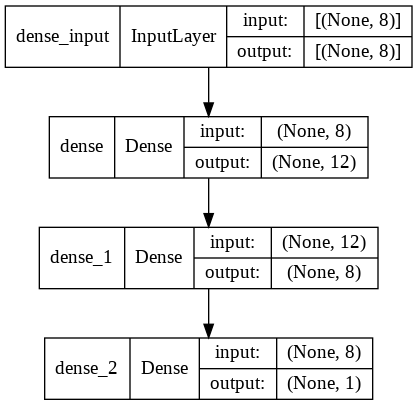

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

Text(0, 0.5, 'Cross entropy loss')

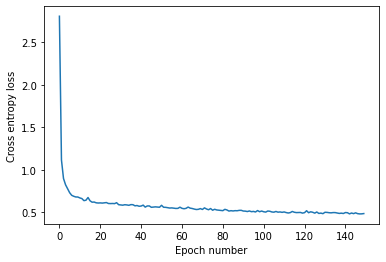

In [ ]:
#Plot history
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('Cross entropy loss')

## Predictions

In [ ]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

# Task 1
Create another model (give it a different name) with a slightly different architecture, e.g. with a different number of neurons in the two hidden layers. Specify how many neurons in each layer. Add an extra hidden layer.

In [ ]:
# define the Keras model
model_arch = Sequential()
model_arch.add(Dense(12, input_dim=8, activation='relu'))
model_arch.add(Dense(10, activation='relu'))
model_arch.add(Dense(8, activation='sigmoid'))
model_arch.add(Dense(1, activation='sigmoid'))
model_arch.add(Dense(1, activation='sigmoid'))

#Check your model 
model_arch.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the Keras model
model_arch.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the Keras model on the dataset
history = model_arch.fit(X, Y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model_arch.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 0.6687 - accuracy: 0.6510
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6510
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6510
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6510
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6510
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6510
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6510
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6510
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6510
Epoch 11/

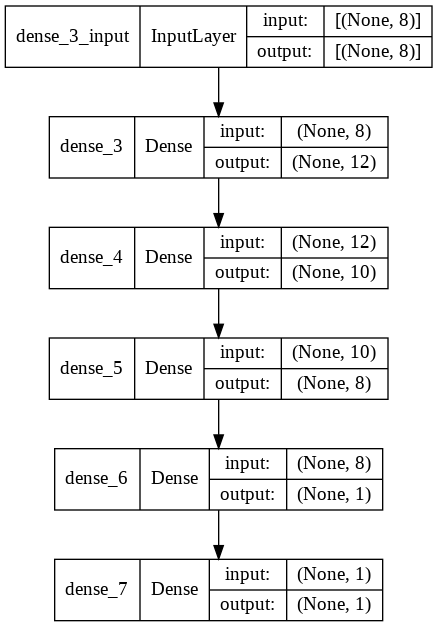

In [ ]:
# Plot model
plot_model(model_arch, show_shapes=True, show_layer_names=True)

Text(0, 0.5, 'Cross entropy loss')

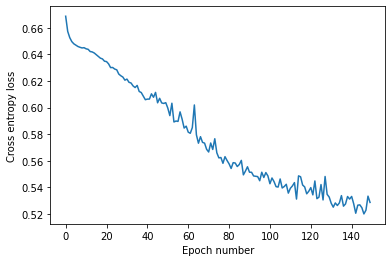

In [ ]:
#Plot history
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('Cross entropy loss')

# Task 2

Split the data into a training set (80%) and a validation set (20%), by setting the *validation_split* parameter appropriately in the Keras model. 


In [ ]:
# fit the Keras model on the dataset
history = model_arch.fit(X, Y, validation_split=0.2, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model_arch.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
62/62 [==============================] - 0s 6ms/step - loss: 0.5161 - accuracy: 0.7492 - val_loss: 0.5317 - val_accuracy: 0.7468
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7427 - val_loss: 0.5576 - val_accuracy: 0.6948
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7378 - val_loss: 0.5492 - val_accuracy: 0.7013
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7492 - val_loss: 0.5485 - val_accuracy: 0.7078
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7459 - val_loss: 0.5614 - val_accuracy: 0.7013
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7524 - val_loss: 0.5438 - val_accuracy: 0.7078
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7410 - val_loss: 0.5589 - val_accuracy: 0.6948
Epoch 8/150
6

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


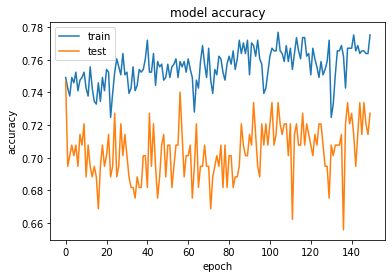

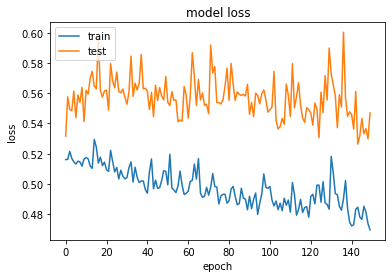

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# define the Keras model
model_arch = Sequential()
model_arch.add(Dense(12, input_dim=8, activation='relu'))
model_arch.add(Dense(10, activation='relu'))
model_arch.add(Dense(8, activation='sigmoid'))
model_arch.add(Dense(1, activation='linear'))
model_arch.add(Dense(1, activation='sigmoid'))

#Check your model 
model_arch.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 10)                130       
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the Keras model
model_arch.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the Keras model on the dataset
history = model_arch.fit(X, Y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model_arch.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 0.7115 - accuracy: 0.4883
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6510
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6510
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6510
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6510
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.6510
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6510
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.6510
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6510
Epoch 11/

Text(0, 0.5, 'Cross entropy loss')

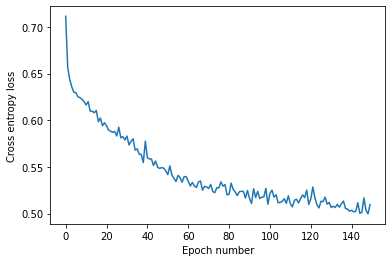

In [ ]:
#Plot history
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('Cross entropy loss')

# Task 5

Increase the number of epochs. See what happens.

In [ ]:
# fit the Keras model on the dataset
history = model_arch.fit(X, Y, epochs=500, batch_size=10)

# evaluate the keras model
_, accuracy = model_arch.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7578
Epoch 2/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7682
Epoch 3/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7708
Epoch 4/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7760
Epoch 5/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7747
Epoch 6/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7656
Epoch 7/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7708
Epoch 8/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7721
Epoch 9/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7708
Epoch 10/500
77/77 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7656
Epoch 11/